In [20]:
import cv2
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
import random
import os
import cv2
import numpy as np

In [21]:
# Arrays to hold the datasets
image_dataset = []
mask_dataset = []

# Path to your data directory
data_dir = r"F:\dub\data"

# Function to normalize images and load masks
def load_and_normalize_images(data_dir):
    image_dir = os.path.join(data_dir, 'images')
    mask_dir = os.path.join(data_dir, 'masks')
    
    # Get the sorted list of image and mask files
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))
    
    for img_file, mask_file in zip(image_files, mask_files):
        # Read the image and mask
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)
        
        # Load the image and normalize (convert to float32 and divide by 255)
        image = cv2.imread(img_path)
        image = image.astype(np.float32) / 255.0  # Normalize image to [0, 1]
        
        # Load the mask (assuming masks are grayscale)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Append to the respective datasets
        image_dataset.append(image)
        mask_dataset.append(mask)

# Call the function to process the images and masks
load_and_normalize_images(data_dir)

# Convert lists to NumPy arrays
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

# Check the shapes of the datasets
print("Image dataset shape:", image_dataset.shape)
print("Mask dataset shape:", mask_dataset.shape)


Image dataset shape: (1410, 256, 256, 3)
Mask dataset shape: (1410, 256, 256)


In [22]:
print(len(image_dataset))
print(len(mask_dataset))

1410
1410


In [23]:
image_dataset=np.array(image_dataset)
mask_dataset=np.array(mask_dataset)

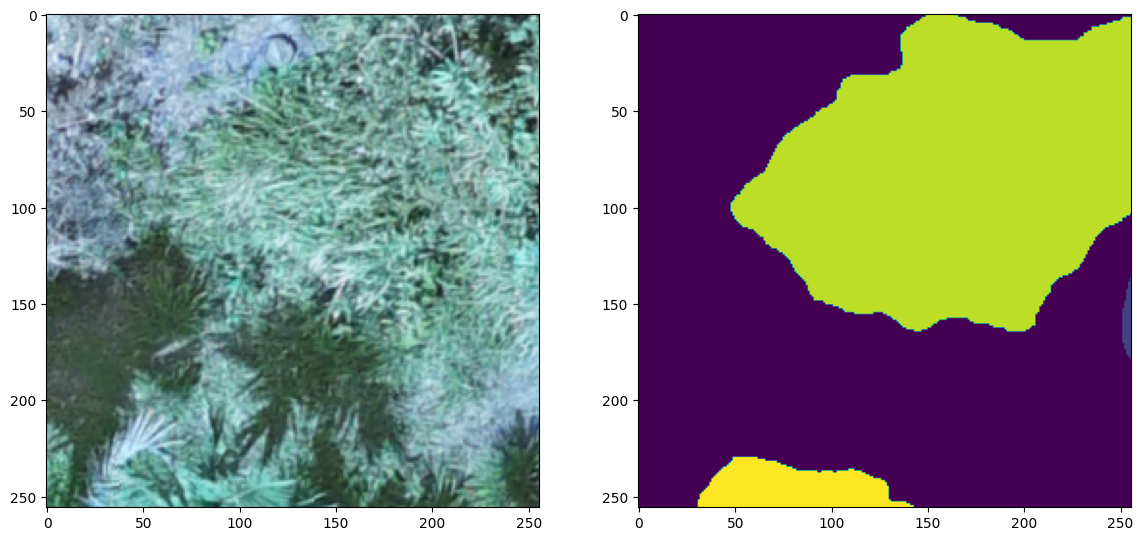

In [24]:


plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[0])
plt.subplot(122)
plt.imshow(mask_dataset[0])

In [25]:
type(image_dataset)

numpy.ndarray

In [26]:
mask_dataset.shape

(1410, 256, 256)

In [27]:


# Array to store the labels for each mask
labels = []

# Class code mappings
class_mapping = {
    0: 'background',
    1: 'banana',
    2: 'coconut',
    9: 'other trees',
    10: 'arecanut'
}

# Path to the masks folder
mask_dir = r"F:\dub\data\masks"

# Function to process masks and assign class labels
def process_masks(mask_dir):
    # Get the list of mask files
    mask_files = sorted(os.listdir(mask_dir))
    
    for mask_file in mask_files:
        # Load the mask as grayscale
        mask_path = os.path.join(mask_dir, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Get unique class codes in the mask
        unique_classes = np.unique(mask)  # Find unique pixel values (class codes) in the mask
        
        # Filter unique class codes to keep only valid ones
        valid_classes = [class_code for class_code in unique_classes if class_code in class_mapping]
        
        # Append the valid class numbers for the current mask to the dataset
        labels.append(valid_classes)
        
        # Print the results for the current mask
        print(f"Mask: {mask_file} contains the following classes: {valid_classes}")

# Call the function to process all masks
process_masks(mask_dir)

# Check the label dataset
print("Label dataset:", labels)

# Convert each list in label_dataset to a tuple
label_tuples = [tuple(l) for l in labels]

# Get unique combinations of class labels in the dataset
unique_combinations = list(set(label_tuples))
print("Unique combinations of class labels:", unique_combinations)


Mask: mask_patch_0.tif contains the following classes: [0, 2, 9, 10]
Mask: mask_patch_1.tif contains the following classes: [0, 2, 9, 10]
Mask: mask_patch_10.tif contains the following classes: [0, 10]
Mask: mask_patch_100.tif contains the following classes: [0, 10]
Mask: mask_patch_1000.tif contains the following classes: [0, 2]
Mask: mask_patch_1001.tif contains the following classes: [0, 2, 9]
Mask: mask_patch_1002.tif contains the following classes: [0, 2, 9]
Mask: mask_patch_1003.tif contains the following classes: [0, 9]
Mask: mask_patch_1004.tif contains the following classes: [0, 9]
Mask: mask_patch_1005.tif contains the following classes: [0, 9]
Mask: mask_patch_1006.tif contains the following classes: [0, 9]
Mask: mask_patch_1007.tif contains the following classes: [0, 9]
Mask: mask_patch_1008.tif contains the following classes: [0, 2, 9]
Mask: mask_patch_1009.tif contains the following classes: [0, 2, 9]
Mask: mask_patch_101.tif contains the following classes: [0, 10]
Mask: 

In [28]:
len(labels)

1410

In [29]:
labels[0]

[0, 2, 9, 10]

In [30]:
labels = [np.array(label) for label in labels]

In [31]:
labels[0]

array([ 0,  2,  9, 10], dtype=uint8)

In [32]:
type(labels)

list

In [33]:
# Flatten the list of lists
flattened_labels = [item for sublist in labels for item in sublist]

# Get unique class labels
labels = np.unique(flattened_labels)

# Print the unique class labels
print("Unique class labels:", labels)


Unique class labels: [ 0  1  2  9 10]


In [34]:
total_classes=len(np.unique(labels))
total_classes

5

In [35]:
from tensorflow.keras.utils import  to_categorical

In [36]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical

# Define the class mapping
class_mapping = {0: 0, 1: 1, 2: 2, 9: 3, 10: 4}

# Path to the masks folder
mask_dir = r"F:\dub\data\masks"  # Change this to your actual mask directory

# Get the list of mask files
mask_files = sorted(os.listdir(mask_dir))

# Initialize a list to hold the masks
masks = []

# Read the masks from the directory
for mask_file in mask_files:
    mask_path = os.path.join(mask_dir, mask_file)
    
    # Load the mask as grayscale
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if mask is not None:
        masks.append(mask)

# Convert the list of masks to a numpy array
masks = np.array(masks)  # Shape will be (num_images, height, width)

# Define the total number of unique classes you are working with
total_classes = len(class_mapping)  # This will be 5 for 0, 1, 2, 9, 10

# Create an empty array to hold the reshaped labels
reshaped_labels = np.zeros((masks.shape[0], 256, 256, total_classes))

# Fill the reshaped labels based on the class mapping
for i in range(masks.shape[0]):
    # Get the unique class values in the current mask
    unique_classes = np.unique(masks[i])
    
    for label in unique_classes:  # Iterate over each unique class in the mask
        if label in class_mapping:  # Ensure the label exists in the mapping
            # Convert the label to its new index
            new_index = class_mapping[label]
            # Create a mask for the current label and assign it to the corresponding channel
            reshaped_labels[i, :, :, new_index] = (masks[i] == label).astype(int)

# Print the shape and the reshaped labels
print("Reshaped labels shape:", reshaped_labels.shape)
print("Reshaped labels dataset:\n", reshaped_labels)


Reshaped labels shape: (1410, 256, 256, 5)
Reshaped labels dataset:
 [[[[1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   ...
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   ...
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 1. 0.]
   [0. 0. 0. 1. 0.]
   [0. 0. 0. 1. 0.]]

  ...

  [[1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   ...
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   ...
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   ...
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]]]


 [[[1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   ...
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0.]]

  [[1. 0. 0. 0. 0.]

In [37]:
reshaped_labels.shape

(1410, 256, 256, 5)

In [38]:
labels_categorical_dataset=reshaped_labels

In [39]:
image_dataset.shape

(1410, 256, 256, 3)

In [40]:
labels_categorical_dataset.shape

(1410, 256, 256, 5)

In [41]:
master_training_dataset=image_dataset

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X_train,X_test,y_train,y_test=train_test_split(master_training_dataset,reshaped_labels,test_size=0.15,random_state=100)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1198, 256, 256, 3)
(212, 256, 256, 3)
(1198, 256, 256, 5)
(212, 256, 256, 5)


In [45]:
image_height=X_train.shape[1]
image_width=X_train.shape[2]
image_channels=X_train.shape[3]
total_classes=y_train.shape[3]

In [46]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
5


In [47]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers import concatenate,BatchNormalization,Dropout,Lambda

In [48]:
len(labels)

5

In [49]:

import keras.backend as K  # Correct import


In [50]:
import tensorflow as tf

def jaccard_coef(y_true, y_pred):
    # Flatten the input tensors
    y_true_flatten = tf.reshape(y_true, [-1])  # Flatten the true labels
    y_pred_flatten = tf.reshape(y_pred, [-1])  # Flatten the predicted labels
    
    # Calculate the intersection
    intersection = tf.reduce_sum(y_true_flatten * y_pred_flatten)
    
    # Jaccard coefficient calculation
    final_coef_value = (intersection + tf.keras.backend.epsilon()) / (
        tf.reduce_sum(y_true_flatten) + tf.reduce_sum(y_pred_flatten) - intersection + tf.keras.backend.epsilon())
    
    return final_coef_value


In [51]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
    inputs=Input((image_height,image_width,image_channels))
    
    source_input=inputs
    
    
    c1 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(source_input)
    c1=Dropout(0.2)(c1)
    c1 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c1)
    p1=MaxPooling2D((2,2))(c1)
    
    c2 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [52]:
metrics=["accuracy",jaccard_coef]

In [53]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
5


In [54]:
def get_deep_learning_model():
    return multi_unet_model(n_classes=total_classes,
                            image_height=image_height,
                            image_width=image_width,
                            image_channels=image_channels)

In [55]:
model=get_deep_learning_model()

In [56]:
model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'cla

In [57]:
weights=[0.2,0.2,0.2,0.2,0.2]

In [58]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.1


In [59]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [60]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [61]:
dice_loss=sm.losses.DiceLoss(class_weights = weights)
focal_loss=sm.losses.CategoricalFocalLoss()
total_loss=dice_loss + (1*focal_loss)

In [62]:
import tensorflow as tf

In [63]:
tf.keras.backend.clear_session()

In [64]:
model.compile(optimizer="adam",loss=total_loss,metrics=metrics)

In [65]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,173 (7.40 MB)

 Trainable params: 1,941,173 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model_history=model.fit(X_train,y_train,
                        batch_size=16,
                        verbose=1,
                        epochs=50,
                        validation_data=(X_test,y_test),
                        shuffle=False)

Epoch 1/50


c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


75/75 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.4625 - jaccard_coef: 0.1870 - loss: 1.0041 - val_accuracy: 0.6033 - val_jaccard_coef: 0.3353 - val_loss: 0.9721
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.5996 - jaccard_coef: 0.3303 - loss: 0.9724 - val_accuracy: 0.6238 - val_jaccard_coef: 0.3823 - val_loss: 0.9627
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6319 - jaccard_coef: 0.3799 - loss: 0.9582 - val_accuracy: 0.6481 - val_jaccard_coef: 0.4355 - val_loss: 0.9500
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.6810 - jaccard_coef: 0.4414 - loss: 0.9409 - val_accuracy: 0.6630 - val_jaccard_coef: 0.4466 - val_loss: 0.9509
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7096 - jaccard_coef: 0.4795 - loss: 0.9306 - val_accuracy: 0.7182 - val_jaccard_coef: 0.4826 - val_loss: 0.9362
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.7316 - jaccard_coef: 0.5058 - loss: 0.9265 - val_accuracy: 0.

In [67]:
history_a=model_history

In [68]:
history_a.history

{'accuracy': [0.5308730602264404,
  0.604131281375885,
  0.6354116201400757,
  0.6827687621116638,
  0.7160251140594482,
  0.7369279861450195,
  0.7706584334373474,
  0.7915026545524597,
  0.8234886527061462,
  0.8489104509353638,
  0.8601833581924438,
  0.8590191602706909,
  0.8686806559562683,
  0.8707070350646973,
  0.8765126466751099,
  0.875173807144165,
  0.8888900279998779,
  0.8876351118087769,
  0.8914034962654114,
  0.8905702829360962,
  0.8894608616828918,
  0.906737744808197,
  0.9025255441665649,
  0.909013569355011,
  0.9071075320243835,
  0.9126237630844116,
  0.901023805141449,
  0.9121573567390442,
  0.9159534573554993,
  0.9101539254188538,
  0.9150111675262451,
  0.9176545143127441,
  0.9248220920562744,
  0.9327576756477356,
  0.9390457272529602,
  0.9422054290771484,
  0.9425964951515198,
  0.9481554627418518,
  0.9496785998344421,
  0.9508460164070129,
  0.9163668751716614,
  0.9272571802139282,
  0.9474933743476868,
  0.9523801207542419,
  0.9536438584327698,
  0

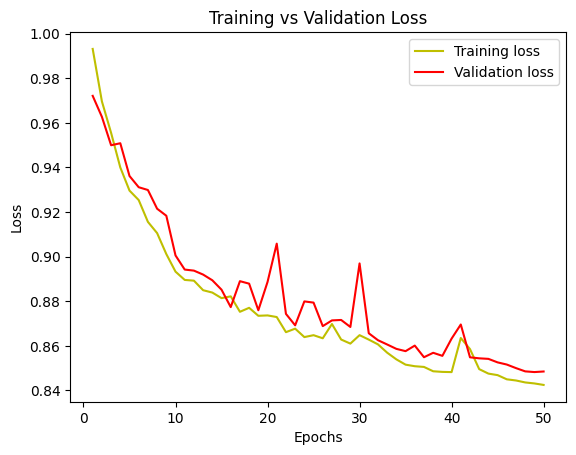

In [69]:
loss=history_a.history['loss']
val_loss=history_a.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label="Training loss")
plt.plot(epochs,val_loss,'r',label="Validation loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

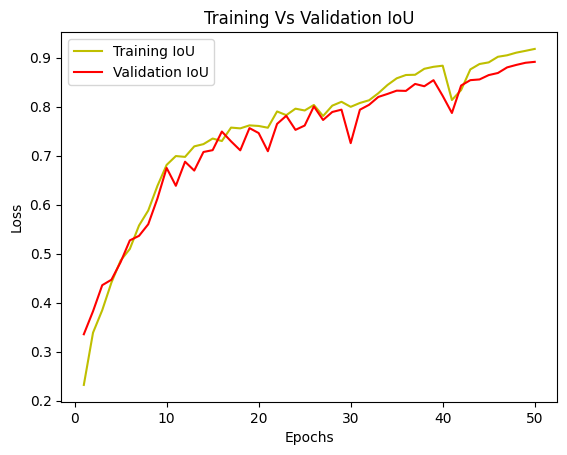

In [70]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [71]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 75}

In [72]:
y_pred=model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 574ms/step


In [73]:
history_a.history

{'accuracy': [0.5308730602264404,
  0.604131281375885,
  0.6354116201400757,
  0.6827687621116638,
  0.7160251140594482,
  0.7369279861450195,
  0.7706584334373474,
  0.7915026545524597,
  0.8234886527061462,
  0.8489104509353638,
  0.8601833581924438,
  0.8590191602706909,
  0.8686806559562683,
  0.8707070350646973,
  0.8765126466751099,
  0.875173807144165,
  0.8888900279998779,
  0.8876351118087769,
  0.8914034962654114,
  0.8905702829360962,
  0.8894608616828918,
  0.906737744808197,
  0.9025255441665649,
  0.909013569355011,
  0.9071075320243835,
  0.9126237630844116,
  0.901023805141449,
  0.9121573567390442,
  0.9159534573554993,
  0.9101539254188538,
  0.9150111675262451,
  0.9176545143127441,
  0.9248220920562744,
  0.9327576756477356,
  0.9390457272529602,
  0.9422054290771484,
  0.9425964951515198,
  0.9481554627418518,
  0.9496785998344421,
  0.9508460164070129,
  0.9163668751716614,
  0.9272571802139282,
  0.9474933743476868,
  0.9523801207542419,
  0.9536438584327698,
  0

In [74]:
len(y_pred)

212

In [75]:
y_pred_argmax=np.argmax(y_pred, axis=3)

In [76]:

y_pred_argmax

array([[[4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0]],

       [[4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        ...,
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [77]:
len(y_pred_argmax)

212

In [78]:
y_test_argmax=np.argmax(y_test, axis=3)

In [79]:
y_test_argmax

array([[[4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        ...,
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0]],

       [[4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        ...,
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0]],

       [[4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 4],
        [0, 0, 0, ..., 0, 0, 4],
        ...,
        [0, 0, 0, ..., 

In [106]:
test_image_number=32

test_image=X_test[test_image_number]
ground_truth_image=y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction=model.predict(test_image_input)
predicted_image=np.argmax(prediction,axis=3)
predicted_image=predicted_image[0,:,:]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


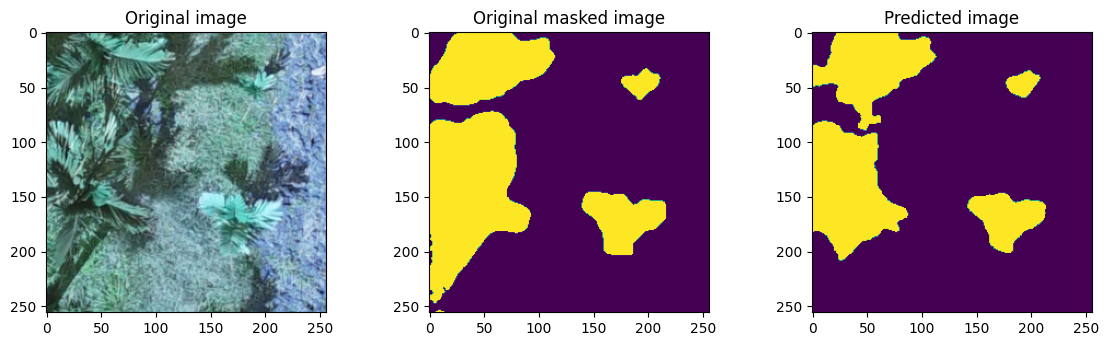

In [107]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted image")
plt.imshow(predicted_image)

In [82]:
print("Predictions shape:", prediction.shape)
print("True labels shape:", y_test.shape)


Predictions shape: (1, 256, 256, 5)
True labels shape: (212, 256, 256, 5)


In [83]:
#saving the model
model.save("segmentation_tree_species.h5")

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step
Predictions shape: (212, 256, 256, 5)
Flattened predictions length: 13893632
Flattened true labels length: 13893632


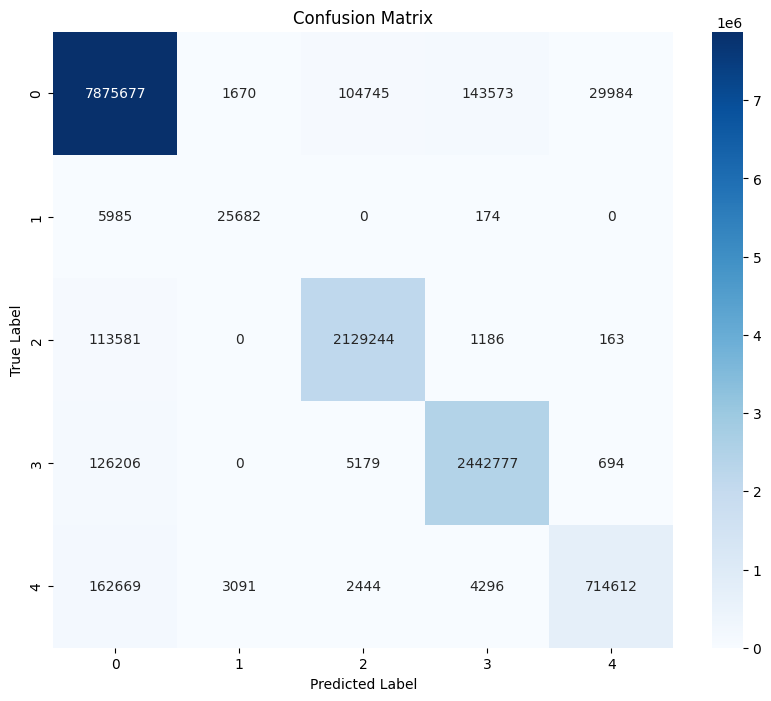

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(X_test)

# Check shape of predictions
print("Predictions shape:", predictions.shape)  # Should be (212, 256, 256, 5) if you have 212 test images

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=-1)  # Get class labels, now should be (212, 256, 256)

# Flatten the arrays
predicted_classes_flat = predicted_classes.flatten()
true_classes_flat = np.argmax(y_test, axis=-1).flatten()  # Convert y_test from one-hot to class labels

# Check lengths
print("Flattened predictions length:", len(predicted_classes_flat))
print("Flattened true labels length:", len(true_classes_flat))

# Step 3: Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes_flat, predicted_classes_flat, labels=np.unique(true_classes_flat))

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(true_classes_flat), 
            yticklabels=np.unique(true_classes_flat))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [85]:
# Assuming you already have the confusion matrix `conf_matrix`
# Step 1: Calculate accuracy
# Sum of true positives (diagonal elements)
true_positives = np.trace(conf_matrix)  # Sum of the diagonal
# Total number of samples
total_samples = np.sum(conf_matrix)

# Step 2: Calculate accuracy
accuracy = true_positives / total_samples if total_samples > 0 else 0

# Step 3: Print the accuracy
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places


Accuracy: 0.9492
